In [1]:
# import libraries
import torch
import numpy as np
import torch.nn as nn

In [2]:
from torchvision import datasets
import torchvision.transforms as transforms

# how many samples per batch to load
batch_size = 512

# convert data to torch.FloatTensor
transform = transforms.ToTensor()

#transform=transforms.Compose([transforms.ToTensor(),
#                              transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
#                             ])

# choose the training and test datasets
train_data = datasets.MNIST(root='data', train=True,
                                   download=True, transform=transform)
test_data = datasets.MNIST(root='data', train=False,
                                  download=True, transform=transform)

# prepare data loaders
train_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size)
test_loader = torch.utils.data.DataLoader(test_data, batch_size=batch_size)

criterion = nn.CrossEntropyLoss()

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting data/MNIST/raw/train-images-idx3-ubyte.gz to data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting data/MNIST/raw/train-labels-idx1-ubyte.gz to data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting data/MNIST/raw/t10k-images-idx3-ubyte.gz to data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting data/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/MNIST/raw



In [3]:
import torch.nn as nn
import torch.nn.functional as F

## Define the NN architecture
class MLP_ActivationOnly(nn.Module):
    def __init__(self):
        super(MLP_ActivationOnly, self).__init__()
        self.fc1 = nn.Linear( 28*28 , 10 ) 
        # linear layer (n_hidden -> hidden_2)

        # linear layer (n_hidden -> ?)
        # self.fc3 = nn.Linear(,)

    def forward(self, x):
        # flatten image input
        x = x.view(-1, 28*28) 
        # # add hidden layer, with relu activation function
        # x = F.relu(self.fc1(x))
        x = self.fc1(x)
        return x

# ADDED Code for RElu activation layer
model_mlp_ActOnly = MLP_ActivationOnly()
print(model_mlp_ActOnly)
for parameter in model_mlp_ActOnly.parameters():
    print(parameter.shape)

MLP_ActivationOnly(
  (fc1): Linear(in_features=784, out_features=10, bias=True)
)
torch.Size([10, 784])
torch.Size([10])


In [4]:
# training code
def train(model, optimizer, epochs=10):
    model.train() # prep model for training

    for epoch in range(n_epochs):
        # monitor training loss
        train_loss = 0.0
        
        ###################
        # train the model #
        ###################
        for data, target in train_loader:
            data = data
            target = target
            # clear the gradients of all optimized variables
            optimizer.zero_grad()
            # forward pass: compute predicted outputs by passing inputs to the model
            output = model(data)
            #print(output, data.shape)
            # calculate the loss
            loss = criterion(output, target)
            # backward pass: compute gradient of the loss with respect to model parameters
            loss.backward()
            # perform a single optimization step (parameter update)
            optimizer.step()
            # update running training loss
            train_loss += loss.item()*data.size(0)
            
        # print training statistics 
        # calculate average loss over an epoch
        train_loss = train_loss/len(train_loader.dataset)

        print('Epoch: {} \tTraining Loss: {:.6f}'.format(
            epoch+1, 
            train_loss
            ))

In [5]:


# initialize lists to monitor test loss and accuracy
def test(model):
    test_loss = 0.0
    class_correct = list(0. for i in range(10))
    class_total = list(0. for i in range(10))

    model.eval() # prep model for *evaluation*

    for data, target in test_loader:
        data = data
        target = target
        # forward pass: compute predicted outputs by passing inputs to the model
        output = model(data)
        # calculate the loss
        loss = criterion(output, target)
        # update test loss 
        test_loss += loss.item()*data.size(0)
        # convert output probabilities to predicted class
        _, pred = torch.max(output, 1)
        # compare predictions to true label
        correct = np.squeeze(pred.eq(target.data.view_as(pred)))
        # calculate test accuracy for each object class
        for i in range(data.shape[0]):
            label = target.data[i]
            class_correct[label] += correct[i].item()
            class_total[label] += 1

    # calculate and print avg test loss
    test_loss = test_loss/len(test_loader.dataset)
    print('Test Loss: {:.6f}\n'.format(test_loss))

    for i in range(10):
        if class_total[i] > 0:
            print('Test Accuracy of %5s: %2d%% (%2d/%2d)' % (
                str(i), 100 * class_correct[i] / class_total[i],
                np.sum(class_correct[i]), np.sum(class_total[i])))
        else:
            print('Test Accuracy of %5s: N/A (no training examples)' % (classes[i]))

    print('\nTest Accuracy (Overall): %2d%% (%2d/%2d)' % (
        100. * np.sum(class_correct) / np.sum(class_total),
        np.sum(class_correct), np.sum(class_total)))



In [6]:
# number of epochs to train the model
n_epochs = 10  # suggest training between 20-50 epochs
# specify optimizer
#model = Net()
optimizer = torch.optim.Adam(model_mlp_ActOnly.parameters(), lr=0.05)
train(model_mlp_ActOnly, optimizer)
test(model_mlp_ActOnly)

Epoch: 1 	Training Loss: 0.442211
Epoch: 2 	Training Loss: 0.340214
Epoch: 3 	Training Loss: 0.334975
Epoch: 4 	Training Loss: 0.333679
Epoch: 5 	Training Loss: 0.334153
Epoch: 6 	Training Loss: 0.336363
Epoch: 7 	Training Loss: 0.338200
Epoch: 8 	Training Loss: 0.338108
Epoch: 9 	Training Loss: 0.336610
Epoch: 10 	Training Loss: 0.334968
Test Loss: 0.387092

Test Accuracy of     0: 98% (968/980)
Test Accuracy of     1: 98% (1117/1135)
Test Accuracy of     2: 86% (894/1032)
Test Accuracy of     3: 85% (860/1010)
Test Accuracy of     4: 90% (885/982)
Test Accuracy of     5: 86% (768/892)
Test Accuracy of     6: 94% (902/958)
Test Accuracy of     7: 89% (915/1028)
Test Accuracy of     8: 88% (859/974)
Test Accuracy of     9: 93% (940/1009)

Test Accuracy (Overall): 91% (9108/10000)


(28, 28)

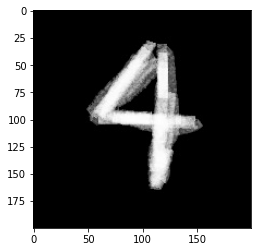

In [7]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
img = cv2.imread('/content/drive/MyDrive/handwrittenDigitNN/4-2.jpg',cv2.IMREAD_GRAYSCALE)
res = cv2.resize(img, dsize=(28,28), interpolation=cv2.INTER_NEAREST)
plt.imshow(img,cmap='gray')
res.shape

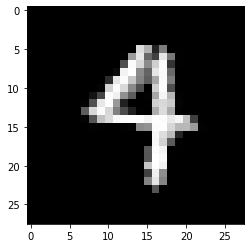

In [8]:
plt.imshow(res,cmap='gray')

In [9]:
pred2 = model_mlp_ActOnly(torch.Tensor(res).view(1,1,28,28))[0]
print(torch.argmax(pred2))

tensor(9)


tensor([-1773.5217, -1797.5797,  -641.5867,   255.2080,  1372.4885,  -824.3648,
        -1475.7354,  -965.2303,   843.0004,  1238.3926],
       grad_fn=<SelectBackward0>)
tensor(4)


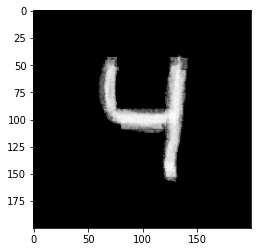

In [10]:
img = cv2.imread('/content/drive/MyDrive/handwrittenDigitNN/4.jpg',cv2.IMREAD_GRAYSCALE)
res = cv2.resize(img, dsize=(28,28), interpolation=cv2.INTER_NEAREST)
plt.imshow(img,cmap='gray')
res.shape

pred2 = model_mlp_ActOnly(torch.Tensor(res).view(1,1,28,28))[0]
print(pred2)
print(torch.argmax(pred2))

In [11]:
print(torch.Tensor(res).view(1,1,28,28))

tensor([[[[  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
             0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
             0.,   0.,   0.,   0.,   0.,   0.],
          [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
             0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
             0.,   0.,   0.,   0.,   0.,   0.],
          [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
             0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
             0.,   0.,   0.,   0.,   0.,   0.],
          [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
             0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
             0.,   0.,   0.,   0.,   0.,   0.],
          [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
             0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
             0.,   0.,   0.,   0.,   0

In [12]:
print(model_mlp_ActOnly)

MLP_ActivationOnly(
  (fc1): Linear(in_features=784, out_features=10, bias=True)
)


In [13]:
print(model_mlp_ActOnly.fc1.bias)

Parameter containing:
tensor([-1.5915,  1.4838,  0.5354, -0.8490,  0.4678,  3.0125, -0.6387,  1.7125,
        -2.9060, -0.5169], requires_grad=True)


In [14]:
print(model_mlp_ActOnly.fc1.weight)

Parameter containing:
tensor([[-0.0357,  0.0141,  0.0313,  ..., -0.0065,  0.0151,  0.0116],
        [ 0.0099, -0.0289, -0.0187,  ..., -0.0287,  0.0047, -0.0089],
        [-0.0226,  0.0036, -0.0069,  ..., -0.0042, -0.0026,  0.0276],
        ...,
        [ 0.0349,  0.0119,  0.0333,  ...,  0.0100, -0.0324,  0.0021],
        [-0.0164,  0.0114, -0.0157,  ...,  0.0112, -0.0105, -0.0112],
        [-0.0307,  0.0312,  0.0321,  ...,  0.0284,  0.0088, -0.0349]],
       requires_grad=True)


In [16]:

# Pytorch to ONNX
onnx_filename = 'mnist.onnx'
dummy_input = torch.Tensor(res).view(1,1,28,28)
input_names = ['act']
output_names = ['out']
model_mlp_ActOnly.eval()
torch.onnx.export(model_mlp_ActOnly, dummy_input, onnx_filename,
                  input_names=input_names, output_names=output_names)

In [21]:
!python --version



Python 3.7.13


In [22]:
!sudo apt install iverilog
!pip3 install veriloggen numpy onnx
!python3 /content/drive/MyDrive/setup.py install

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following packages were automatically installed and are no longer required:
  libnvidia-common-460 nsight-compute-2020.2.0
Use 'sudo apt autoremove' to remove them.
Suggested packages:
  gtkwave
The following NEW packages will be installed:
  iverilog
0 upgraded, 1 newly installed, 0 to remove and 42 not upgraded.
Need to get 1,811 kB of archives.
After this operation, 6,206 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 iverilog amd64 10.1-0.1build1 [1,811 kB]
Fetched 1,811 kB in 1s (2,922 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a 

In [ ]:
def float_bin(number, places = 23): 
  
    # split() seperates whole number and decimal  
    # part and stores it in two seperate variables 
    whole, dec = str(number).split(".") 
  
    # Convert both whole number and decimal   
    # part from string type to integer type 
    whole = int(whole) 
    dec = int (dec) 
  
    # Convert the whole number part to it's 
    # respective binary form and remove the 
    # "0b" from it. 
    res = bin(whole).lstrip("0b") + "."
  
    # Iterate the number of times, we want 
    # the number of decimal places to be 
    for x in range(places): 
  
        # Multiply the decimal value by 2  
        # and seperate the whole number part 
        # and decimal part 
        whole, dec = str((decimal_converter(dec)) * 2).split(".") 
  
        # Convert the decimal part 
        # to integer again 
        dec = int(dec) 
  
        # Keep adding the integer parts  
        # receive to the result variable 
        res += whole 
  
    return res 
  
# Function converts the value passed as 
# parameter to it's decimal representation 
def decimal_converter(num):  
    while num > 1: 
        num /= 10
    return num 


print(float_bin(-2.7))


-0b10.10110011001100110011001


In [ ]:
f = 21845;
n=(int)(f*65536);
print(n)
print(bin(n))

n =1
nw =(float)(n/65536)
print(nw)

1431633920
0b1010101010101010000000000000000
1.52587890625e-05


In [ ]:

def read(filename):
    # return open(os.path.join(os.path.dirname(__file__), filename), encoding='utf8').read()
    return open(os.path.join(os.path.dirname(__file__), filename)).read()


print()